### OCEANAIR Business Transaction Review

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

###### Import the dataset

In [2]:
data = pd.read_excel('OCEANAIR/BusinessReview_2020_6.23.2020.xlsx')
data.head()

,FILE_NO,REPORT_DATE,Month,Year,DATE_OPENED,DIVISION,BUSINESS_LINE,METHOD_OF_TRANSPORT,CUSTOMER_NAME,CUSTOMER_CITY,SHIPPER_NAME,CONSIGNEE_NAME,GROSS_WEIGHT,REVENUE,EXPENSE,PROFIT,DUTY_BILLED,TOTAL_BILLED_TO_ACCOUNT,Rev._Less_Duties
0,1114897-01,2019-11-02,Nov,2019,2019-09-25,10,15.0,OE,SENATOR INTERNATIONAL SPEDITION GMB,HAMBURG,WEB INDUSTRIES INC.,WEB INDUSTRIES STADE GMBH,13794.338,2279.90,1177.36,1102.54,NaN,2279.90,2279.90
1,1114909-01,2019-11-09,Nov,2019,2019-09-30,10,15.0,OE,SENATOR INTERNATIONAL SPEDITION GMB,HAMBURG,WEB INDUSTRIES INC.,WEB INDUSTRIES STADE GMBH,10484.895,2279.90,1177.36,1102.54,NaN,2279.90,2279.90
2,1114914-01,2019-12-08,Dec,2019,2019-10-03,10,15.0,OE,3S FABRICATIONS (PVT) LTD,DANKOTUWA,GROUP FOUR TRANSDUCERS,3S FABRICATIONS (PVT) LTD,6154.858,4930.32,3824.38,1105.94,NaN,4930.32,4930.32
3,1114916-01,2019-11-11,Nov,2019,2019-10-04,10,15.0,OE,SHEANDRO LLC,SARASOTA,SHEANDRO LLC,SIMO S.R.L.,1423.841,2305.14,2004.50,300.64,NaN,2305.14,2305.14
4,1114922-01,2019-11-11,Nov,2019,2019-10-11,10,15.0,OE,ALISPED JAPAN LTD.,CHIYODA-KU,POLYMERIC SYSTEM INC,ITW PP&F JAPAN C/O NIHONGOSEIKAKO,723.941,816.85,484.34,332.51,NaN,816.85,816.85


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   FILE_NO                  14717 non-null  object        
 1   REPORT_DATE              14723 non-null  datetime64[ns]
 2   Month                    14723 non-null  object        
 3   Year                     14723 non-null  int64         
 4   DATE_OPENED              14723 non-null  datetime64[ns]
 5   DIVISION                 14723 non-null  int64         
 6   BUSINESS_LINE            14711 non-null  float64       
 7   METHOD_OF_TRANSPORT      14723 non-null  object        
 8   CUSTOMER_NAME            14698 non-null  object        
 9   CUSTOMER_CITY            14695 non-null  object        
 10  SHIPPER_NAME             11250 non-null  object        
 11  CONSIGNEE_NAME           14446 non-null  object        
 12  GROSS_WEIGHT             14237 n

In [4]:
data = data[pd.notnull(data['FILE_NO'])]
filtered_data = data[['CUSTOMER_NAME','FILE_NO']].drop_duplicates()

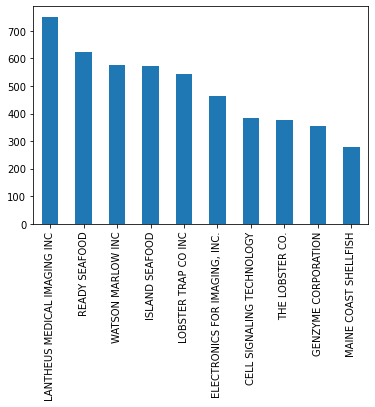

In [5]:
filtered_data.CUSTOMER_NAME.value_counts()[:10].plot(kind='bar')

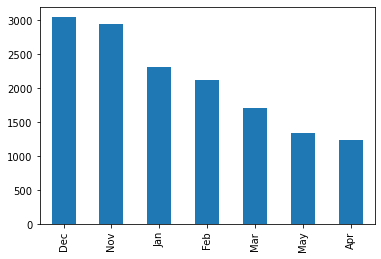

In [6]:
date_filter = data[['Month', 'FILE_NO']].drop_duplicates()
date_filter.Month.value_counts().plot(kind='bar')

In [7]:
dec_data = data[data.Month=='Dec']
dec_data.describe()

,Year,DIVISION,BUSINESS_LINE,GROSS_WEIGHT,REVENUE,EXPENSE,PROFIT,DUTY_BILLED,TOTAL_BILLED_TO_ACCOUNT,Rev._Less_Duties
count,3050.0,3050.000000,3050.000000,2952.00000,2960.000000,2794.000000,2928.000000,817.000000,2805.000000,3015.000000
mean,2019.0,30.681967,40.010820,3347.14901,2611.266233,2254.362434,488.613186,6354.466756,2657.446799,841.707698
std,0.0,19.182723,12.432285,6626.36145,4230.456060,4183.691052,550.694976,13965.639149,4306.329633,7617.400827
min,2019.0,10.000000,15.000000,1.00000,5.000000,-1257.600000,-10945.100000,0.030000,-25.190000,-311939.570000
25%,2019.0,10.000000,35.000000,327.00000,759.105000,539.415000,209.000000,656.060000,782.000000,419.945000
50%,2019.0,40.000000,35.000000,1088.63000,1413.700000,1054.305000,349.700000,2414.280000,1435.600000,987.900000
75%,2019.0,40.000000,55.000000,2717.00000,2887.270000,2332.900000,602.250000,7015.400000,2948.000000,2102.000000
max,2019.0,80.000000,78.000000,68681.00000,63370.130000,63095.640000,11625.300000,312219.570000,63502.130000,63370.130000


### Pull the relavent data fields

In [8]:
data_filter = data[['FILE_NO','REPORT_DATE', 'CUSTOMER_NAME', 'Month', 'REVENUE', 'EXPENSE', 'PROFIT']]
data_filter.describe()

,REVENUE,EXPENSE,PROFIT
count,14367.000000,13743.000000,14318.000000
mean,2890.169077,2545.034280,457.232366
std,5416.305398,5288.901198,604.859435
min,-15.000000,-1257.600000,-10945.100000
25%,698.075000,503.275000,209.500000
50%,1360.500000,1001.540000,332.585000
75%,3013.300000,2526.635000,564.980000
max,133291.820000,119458.920000,17837.500000


#### The Data date range

In [9]:
data_filter['REPORT_DATE'].min(), data_filter['REPORT_DATE'].max()

(Timestamp('2019-11-01 00:00:00'), Timestamp('2020-05-31 00:00:00'))

In [10]:
PRESENT = dt.datetime(2020,6,23)
data_filter['REPORT_DATE'] = pd.to_datetime(data_filter['REPORT_DATE'])
data_filter.head()

C:\Users\ozzco\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FILE_NO,REPORT_DATE,CUSTOMER_NAME,Month,REVENUE,EXPENSE,PROFIT
0,1114897-01,2019-11-02,SENATOR INTERNATIONAL SPEDITION GMB,Nov,2279.90,1177.36,1102.54
1,1114909-01,2019-11-09,SENATOR INTERNATIONAL SPEDITION GMB,Nov,2279.90,1177.36,1102.54
2,1114914-01,2019-12-08,3S FABRICATIONS (PVT) LTD,Dec,4930.32,3824.38,1105.94
3,1114916-01,2019-11-11,SHEANDRO LLC,Nov,2305.14,2004.50,300.64
4,1114922-01,2019-11-11,ALISPED JAPAN LTD.,Nov,816.85,484.34,332.51


### Calculating the Recency of Customer Files along with the Frequency

In [11]:
rfm = data_filter.groupby('CUSTOMER_NAME').agg({'REPORT_DATE': lambda date: (PRESENT - date.max()).days,
                                               'FILE_NO': lambda num: len(num),
                                               'REVENUE': lambda rev: rev.sum()})
rfm.columns

Index(['REPORT_DATE', 'FILE_NO', 'REVENUE'], dtype='object')

In [12]:
# Changing the Names of the Columns
rfm.columns = [ 'recency', 'frequency', 'monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
CUSTOMER_NAME,,,
"""POSE"" PACIFIC 2.1 ENTERTAINMENT",123,1,4465.40
12 MIGHTY ORPHANS,194,3,2595.64
20TH CENTURY FOX FILM CORP,169,1,1935.00
3S FABRICATIONS (PVT) LTD,27,24,89652.59
4D TRANSPORTATION,193,1,4080.00


### Obtaining the Quantile of RFM values

In [13]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'].drop_duplicates(), 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CUSTOMER_NAME,,,,,,
"""POSE"" PACIFIC 2.1 ENTERTAINMENT",123,1,4465.40,3,4,3
12 MIGHTY ORPHANS,194,3,2595.64,4,4,3
20TH CENTURY FOX FILM CORP,169,1,1935.00,4,NaN,3
3S FABRICATIONS (PVT) LTD,27,24,89652.59,1,4,1
4D TRANSPORTATION,193,1,4080.00,4,NaN,3


In [14]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.to_excel('OCEANAIR/Business_Reviewv2.xlsx')
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CUSTOMER_NAME,,,,,,,
"""POSE"" PACIFIC 2.1 ENTERTAINMENT",123,1,4465.40,3,4,3,343
12 MIGHTY ORPHANS,194,3,2595.64,4,4,3,443
20TH CENTURY FOX FILM CORP,169,1,1935.00,4,NaN,3,4nan3
3S FABRICATIONS (PVT) LTD,27,24,89652.59,1,4,1,141
4D TRANSPORTATION,193,1,4080.00,4,NaN,3,4nan3
...,...,...,...,...,...,...,...
ZIPWALL LLC,27,69,153970.72,1,2,1,121
"ZIPWALL, LCC",208,1,300.00,4,NaN,4,4nan4
ZOLL MEDICAL CORP,25,13,11148.91,1,NaN,2,1nan2


In [15]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CUSTOMER_NAME,,,,,,,
TIMES MICROWAVE SYSTEMS,26,125,1831865.56,1,1,1,111
"ELECTRONICS FOR IMAGING, INC.",24,464,1817985.92,1,1,1,111
LANTHEUS MEDICAL IMAGING INC,23,751,1668080.76,1,1,1,111
THE DESIGN HOUSE,25,272,1397251.76,1,1,1,111
WATSON MARLOW INC,24,576,1305775.52,1,1,1,111
READY SEAFOOD,23,624,1123942.24,1,1,1,111
THE LOBSTER CO.,23,375,1012924.98,1,1,1,111
LOBSTER TRAP CO INC,23,542,928843.67,1,1,1,111
ISLAND SEAFOOD,27,572,846414.31,1,1,1,111


In [17]:
data_filter['CUSTOMER_NAME'].describe()

count                            14697
unique                             674
top       LANTHEUS MEDICAL IMAGING INC
freq                               751
Name: CUSTOMER_NAME, dtype: object

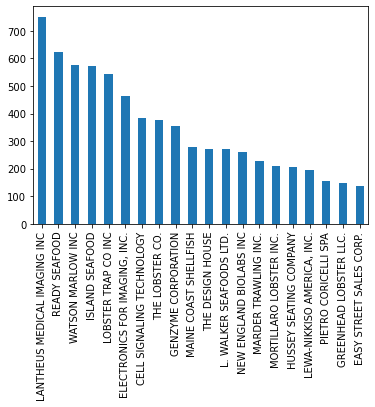

In [23]:
data_filter['CUSTOMER_NAME'].value_counts()[:20].plot(kind='bar')

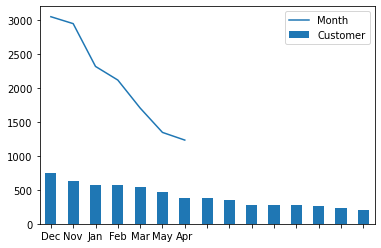

In [71]:
data['CUSTOMER_NAME'].value_counts()[:15].plot(kind='bar', label='Customer'), data['Month'].value_counts().plot(kind='line')
plt.legend()
plt.show()